In [21]:
import pandas as pd
import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
import numpy as np

In [5]:
train=pd.read_csv("../data/train.csv")

In [7]:
train.sample(5)

id  carat        cut color clarity  depth  table     x     y     z  \
16289  16289   1.51       Fair     H     SI2   65.5   56.0  7.18  7.13  4.69   
27427  27427   1.01  Very Good     H     VS1   62.0   60.0  6.43  6.38  3.97   
17758  17758   1.59    Premium     J     SI1   62.5   60.0  7.42  7.46  4.65   
19696  19696   0.27  Very Good     E     VS1   61.9   59.0  4.16  4.21  2.59   
5488    5488   0.70       Good     I     SI1   64.3   57.0  5.59  5.63  3.61   

       price  
16289   6816  
27427   5593  
17758   7695  
19696    470  
5488    2034

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [9]:
train.shape

(40455, 11)

In [14]:
pd.isna(train).sum() #Compruebo que no hay nulos.

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
train.describe()

id         carat         depth         table             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean   20227.000000      0.798406     61.744793     57.450157      5.733269   
std    11678.496907      0.473424      1.430860      2.235814      1.120257   
min        0.000000      0.200000     43.000000     43.000000      0.000000   
25%    10113.500000      0.400000     61.000000     56.000000      4.710000   
50%    20227.000000      0.700000     61.800000     57.000000      5.700000   
75%    30340.500000      1.040000     62.500000     59.000000      6.540000   
max    40454.000000      5.010000     79.000000     95.000000     10.740000   

                  y             z         price  
count  40455.000000  40455.000000  40455.000000  
mean       5.736107      3.539249   3939.026968  
std        1.119260      0.693619   3995.017122  
min        0.000000      0.000000    327.000000  
25%        4.720000      2.910000    949.000000  
50%        5.710000      3.530000   2404.000000  
75%        6.540000      4.040000   5331.000000  
max       31.800000      6.980000  18818.000000

### Compruebo si algunas de las variables explicativas del precio están altamente relacionadas. 

In [19]:
corr = train.corr()

In [20]:
corr

id     carat     depth     table         x         y         z  \
id     1.000000 -0.003349  0.007690 -0.007495 -0.003985 -0.003997 -0.003010   
carat -0.003349  1.000000  0.025563  0.181437  0.976119  0.968747  0.969643   
depth  0.007690  0.025563  1.000000 -0.297741 -0.028409 -0.031153  0.093987   
table -0.007495  0.181437 -0.297741  1.000000  0.195592  0.187326  0.154194   
x     -0.003985  0.976119 -0.028409  0.195592  1.000000  0.991276  0.986062   
y     -0.003997  0.968747 -0.031153  0.187326  0.991276  1.000000  0.980160   
z     -0.003010  0.969643  0.093987  0.154194  0.986062  0.980160  1.000000   
price -0.004065  0.921128 -0.015052  0.127691  0.884874  0.880575  0.875011   

          price  
id    -0.004065  
carat  0.921128  
depth -0.015052  
table  0.127691  
x      0.884874  
y      0.880575  
z      0.875011  
price  1.000000

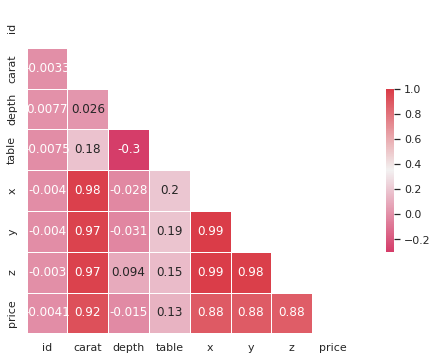

In [33]:
mascara = np.triu(np.ones_like(corr, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True);

In [23]:
train.drop(["x"],axis=1, inplace=True)

In [24]:
corr2 = train.corr()

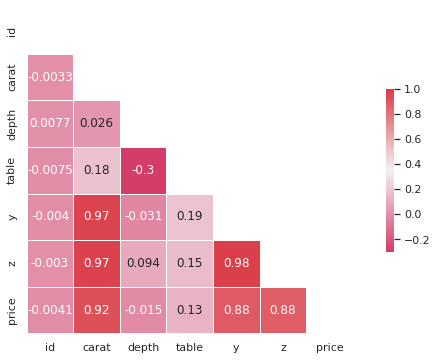

In [34]:
mascara = np.triu(np.ones_like(corr2, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr2,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True);

In [26]:
train.drop(["y"],axis=1, inplace=True)

In [27]:
corr3=train.corr()

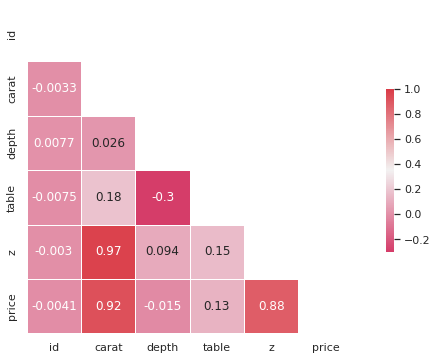

In [35]:
mascara = np.triu(np.ones_like(corr3, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr3,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True);

In [29]:
train.drop(["z"],axis=1, inplace=True)

In [30]:
corr4=train.corr()

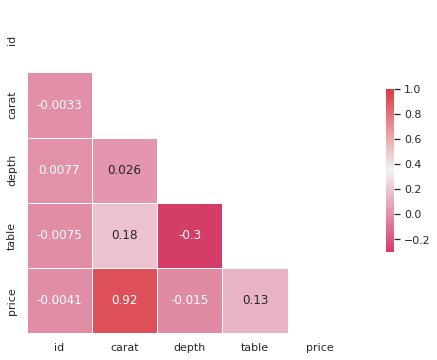

In [36]:
mascara = np.triu(np.ones_like(corr4, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr4,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True);

In [37]:
train.head()

id  carat    cut color clarity  depth  table  price
0   0   1.14  Ideal     G    VVS2   61.0   56.0   9013
1   1   0.76  Ideal     H     VS2   62.7   57.0   2692
2   2   0.84  Ideal     G     VS1   61.4   56.0   4372
3   3   1.55  Ideal     H     VS1   62.0   57.0  13665
4   4   0.30  Ideal     G     SI2   61.9   57.0    422

### Exploramos las columnas categóricas y las convertimos a numéricas:

In [38]:
train.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [55]:
dic_para_cut = {"Fair": 1,
                "Good": 2,
                "Very Good": 3,
                "Ideal":4,
                "Premium":5}         

In [51]:
pd.Series(train.color.unique()).sort_values()

6    D
4    E
2    F
0    G
1    H
5    I
3    J
dtype: object

In [56]:
dic_para_color ={"J":1,
                "I":2,
                "H":3,
                "G":4,
                "F":5,
                "E":6,
                "D":7} 

In [54]:
pd.Series(train.clarity.unique()).sort_values()

7      I1
6      IF
4     SI1
3     SI2
2     VS1
1     VS2
5    VVS1
0    VVS2
dtype: object

In [57]:
dic_para_clarity ={"IF":1,
                "VVS1":2,
                "VVS2":3,
                "VS1":4,
                "VS2":5,
                "SI1":6,
                "SI2":7,
                "I1":8} 

In [67]:
train["cut_num"] = train["cut"].map(dic_para_cut)

In [69]:
train["color_num"] = train["color"].map(dic_para_color)

In [70]:
train["clarity_num"] = train["clarity"].map(dic_para_clarity)

In [75]:
borrar=["cut","color","clarity"]

In [79]:
train.drop(columns=borrar, inplace=True)

In [80]:
train.head()

id  carat  depth  table  price  cut_num  color_num  clarity_num
0   0   1.14   61.0   56.0   9013        4          4            3
1   1   0.76   62.7   57.0   2692        4          3            5
2   2   0.84   61.4   56.0   4372        4          4            4
3   3   1.55   62.0   57.0  13665        4          3            4
4   4   0.30   61.9   57.0    422        4          4            7

In [82]:
train.to_csv("../data/train2.csv")